# TP2 Traitement Audio 

##  Analyse temps-fréquence et principe d’incertitude
### $ Auteurs: $
### $ koussaila $ $ KADI $ 
### $ Mickaël$  $Da$ $Rocha$ $Martin$

---------------------------------------
### $email:$ $kadi.koussaila@outlook.fr$



## Résumé: 
La première partie sera dédiée à l’implémentation de la transformée de Fourier à Court-Terme (TFCT). La fonction, que l’on nommera tfct.py, aura pour paramètres d’entrée le chemin d’un fichier son, la taille de la fenêtre d’analyse Nwin , le pas d’avancement de la fenêtre d’analyse Nhop , le nombre de points fréquentiels Nfft utilisés pour la TFD et la fréquence d’échantillonnage. On supposera dans toute la suite et par défaut que Nfft = Nwin et Nhop = Nwin/2, et on travaillera
avec une fenêtre de Hamming. Les paramètres de sortie seront la matrice TFCT du signal, notée xmat , ainsi que les vecteurs fréquentiels et temporels utiles à l’affichage de la TFCT. Cette première partie vise à réimplémenter les différentes étapes de la TFCT

## étapes :
### 1. Transformée de Fourier à court-terme
### 2. Principe d’incertitude temps-fréquence

In [1]:
#Importation des bibliothèques utiles : 

import numpy as np
from numpy.fft import fft, ifft
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
import math 
import scipy


## 2.1 Transformée de Fourier à court-terme

nb échantillons du signal audio :  171744
Fréquence d'échantillonage :  16000


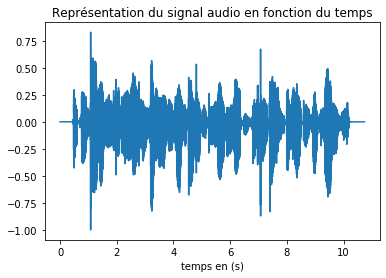

In [2]:
#Question 1

fe,xvect=wav.read("sound.wav")  # extraction du signal et de la fréquence d'echantillonage du signal audio

print("nb échantillons du signal audio : ",len(xvect))
print("Fréquence d'échantillonage : ",fe)

T = np.arange(0, len(xvect)*1/fe, 1/fe)

plt.plot(T,xvect/max(abs(xvect)))
plt.title("Représentation du signal audio en fonction du temps")
plt.xlabel("temps en (s)")

plt.show()


Ci dessus notre signal audio normalisé, le signal est de 171744 échantillons avec un fréquence d'échantillonage de 16000Hz.
On a donc un signal de 171744/16000 = 10.734secondes 

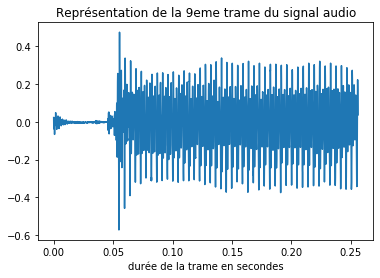

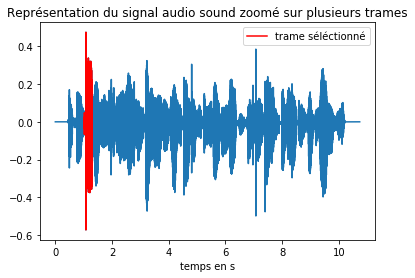

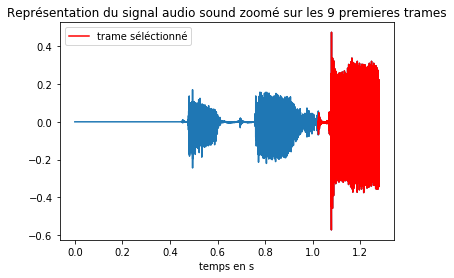

In [3]:
Nwin = 4096
Nfft = Nwin
Nhop = Nwin/2 # pas d'avancement de chaque trame.


trame = xvect[4*Nwin:5*Nwin]  # représentation d'une des trames on choisis ici la 9e trame de notre signal audio
# qui représente les premiere variations de notre signal 

temps=np.linspace(0,len(trame)/fe,Nfft) # vecteur temps correspondant à la taille de trame choisis

plt.figure()
plt.plot(temps,trame/2**15)
plt.title("Représentation de la 9eme trame du signal audio")
plt.xlabel('durée de la trame en secondes')


plt.figure()

plt.plot(T,xvect/2**15)
plt.plot(T[4*Nwin:5*Nwin],xvect[4*Nwin:5*Nwin]/2**15,'r',label='trame séléctionné')
plt.title("Représentation du signal audio sound zoomé sur plusieurs trames")
plt.xlabel('temps en s')
plt.legend()
plt.show()

plt.figure()
plt.plot(T[0*Nwin:5*Nwin],xvect[0*Nwin:5*Nwin]/2**15)
plt.plot(T[4*Nwin:5*Nwin],xvect[4*Nwin:5*Nwin]/2**15,'r',label='trame séléctionné')
plt.title("Représentation du signal audio sound zoomé sur les 9 premieres trames")
plt.xlabel('temps en s')
plt.legend()
plt.show()


Ici chaque trame à un pas de : (taille de la trame)/2, soit un recouvrement de 50%

On choisit pour cette exercice, une trame de 4096 échantillons, ce qui représente par rapport a notre signal audio : 
4096/16000 = 0.256 secondes.

On séléctionne la 9eme trame de notre signal audio car on peux y observer des variations au niveau temporelle.
le premier graphique représente, la trame séléctionné ainsi que ça durée.

Dans le deuxieme graphique , nous avons zooumé notre signal sur les 9 premieres trames du signal audio, en rouge on a la trame que l'on a séléctionné.

Dans le troisieme graphique, il s'agit de la représentation de l'ensemble de notre signal audio ( toutes les trames sont représentés) et en rouge on a la 9eme trame, celle que l'on a séléctionnée.

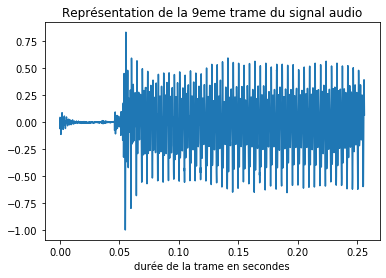

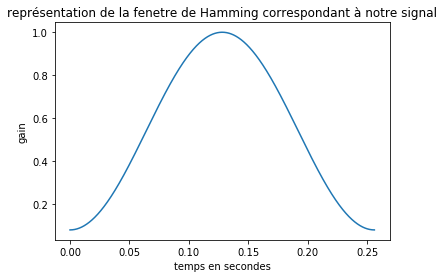

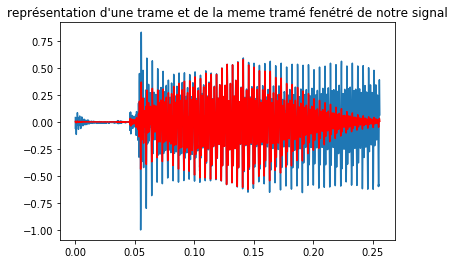

In [4]:
#Question 2

# représentation de notre fenetre de hamming a l'aide la fonction hamming dans le module np
plt.figure()
plt.plot(temps,trame/max(abs(xvect)))
plt.title("Représentation de la 9eme trame du signal audio")
plt.xlabel('durée de la trame en secondes')

plt.figure()
fenetre = np.hamming(Nfft)
plt.plot(temps,fenetre)
plt.title("représentation de la fenetre de Hamming correspondant à notre signal")
plt.ylabel("gain")
plt.xlabel("temps en secondes")
plt.show()
plt.figure()
trame_fenetre = trame*fenetre # la trame fenétré
plt.plot(temps,trame/max(abs(xvect)))     # représentation de la trame
plt.plot(temps,trame_fenetre/max(abs(xvect)), 'r')  # représentaiton de la trame fenétré en rouge
plt.title("représentation d'une trame et de la meme tramé fenétré de notre signal")
plt.show()


Ici, on à la représentation de la trame séléctionnée, ainsi que son fenetrage par une fenetre de hamming en rouge.

On observe en rouge une atténuation de la tramé séléctionnée, cette atténuation correspond à la courbe de notre fenetre de hamming convolué avec notre trame. D'où une atténuation d'autant plus grande lorsque l'on se rapproche des extrémitées de notre trames.

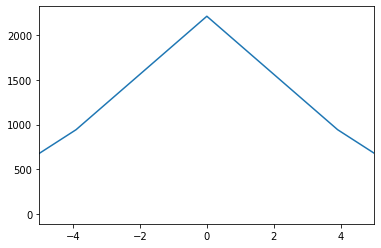

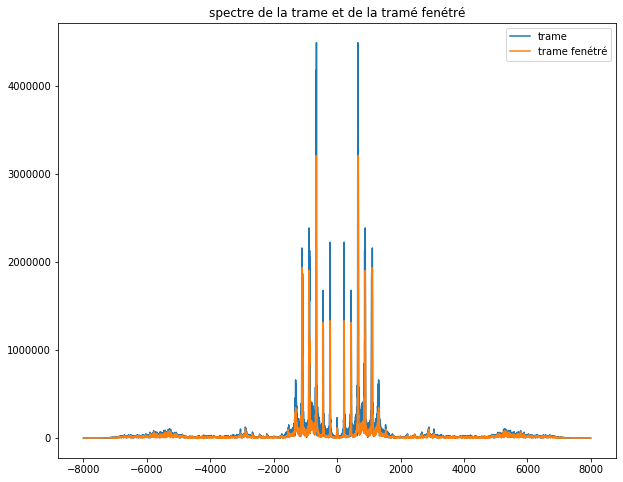

In [5]:
# représentation fréquentielle

# spectre de la trame
TFD=np.fft.fft(trame)
spectre=np.fft.fftshift(TFD)
spectre=np.absolute(spectre)
freq=np.arange(-fe/2,fe/2,fe/len(spectre))


freq=np.arange(-fe/2,fe/2,fe/len(spectre))# on créé le vecteur des fréquence de notre signal entre -Fe/2 et Fe/2

#spectre de hamming
plt.figure()
TFD_hamming= np.fft.fft(fenetre)
spectre_hamming=np.fft.fftshift(TFD_hamming)
spectre_hamming=np.absolute(spectre_hamming)
plt.plot(freq,spectre_hamming)
plt.xlim(-5,5)
plt.show()


# spectre de la trame fenetre
TFD_fenetre=TFD=np.fft.fft(trame_fenetre)
spectre_fenetre=np.fft.fftshift(TFD_fenetre)
spectre_fenetre=np.absolute(spectre_fenetre)
freq2=np.arange(-fe/2,fe/2,fe/len(spectre_fenetre))

#tracer des deux spectres 
plt.figure(figsize=(10,8))
plt.plot(freq,spectre,label="trame")
plt.plot(freq2, spectre_fenetre,label="trame fenétré")
plt.title("spectre de la trame et de la tramé fenétré");
plt.legend()
plt.show()




In [6]:
#Question 3 

def tftct(x, Nwin, Nhop, Nfft, fe):
    
    L=int((len(x)-Nwin)/Nhop) +1 ;M=Nfft # L nombre de trame à extraire dans xvect une partie du signal
    # M nombre minimal de points fréquentiels utiles pour chaque spectre
    #L2=int((len(x)/Nwin)*2-1)
    xmat=np.zeros((M,L))        # initialisation de la matrice xmat de taille Mx
    sigMat = []
    colonne=0
    i=0
    hamming=np.hamming(Nwin)  # fenetre de hamming de taille Nwin

    while (int(i+Nwin)<=int(len(x))): 
        for j in range(int(i),int(i+Nwin)):
            sigMat.append(x[j])  #on recupere la trame correpondant i+Nwin trame
        
            
        TFD=np.fft.fft(sigMat*hamming)  # on multiplie notre fenetre par les Nfft points de notre signal xx
        xmat[:,colonne]=np.absolute(TFD)
        colonne+=1  # on incremente la variable qui change les collonnes de la matrice Xmat
        i=i+Nhop   # on déclale d'une demi trame, soit le pas d'avancement Nhop 
        sigMat=[] # on efface la trame ancienne
        
    
    f=np.linspace(0,fe,Nfft)
    t=np.linspace(0,len(x)/fe,Nfft)
        
    print(M,L)
    return xmat[0:int(Nfft/2+1),:],t,f 
  

On définit le nombre de trames à extraire par : L = partie_entiere( (taille_signal / Nwin ) * 2 -1) 
Fonctionne si le nombre de trame est un multiple du nombre d'echantillons.

sinon, on utilise :

L=partie_entiere((taille_signal -Nwin) / Nhop) +1)

M=Nfft le nbre de points fréquentiels



4096 82
/home/koussaila/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  


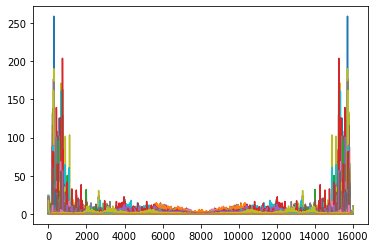

<Figure size 432x288 with 0 Axes>

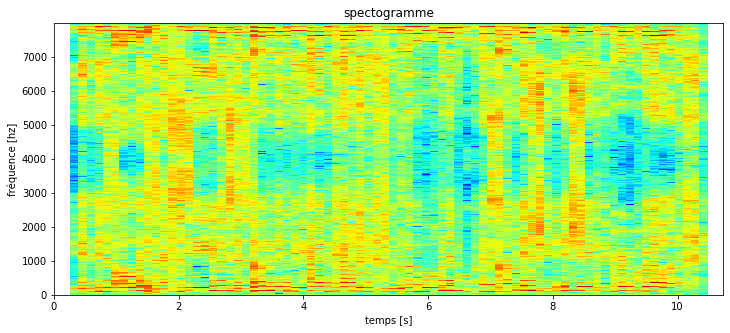

In [11]:
# Question 4 
#normaliser le signal d'entrée:
x=xvect/max(abs(xvect))

xmat,t,f=tftct(x,Nwin,Nhop,Nfft,fe)
plt.figure()
plt.plot(freq,xmat)
plt.figure()



plt.figure(figsize=(12,5))
plt.title("spectogramme")
plt.imshow(20*np.log10(xmat),aspect ='auto', origin='lower',cmap='jet',extent=(0,t[-1],0,f[-1]//2))
plt.xlabel('temps [s]')
plt.ylabel("fréquence [hz]")
plt.show()


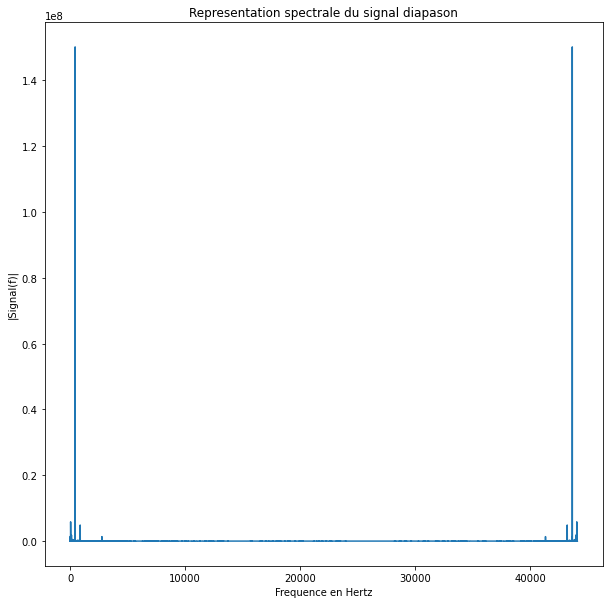

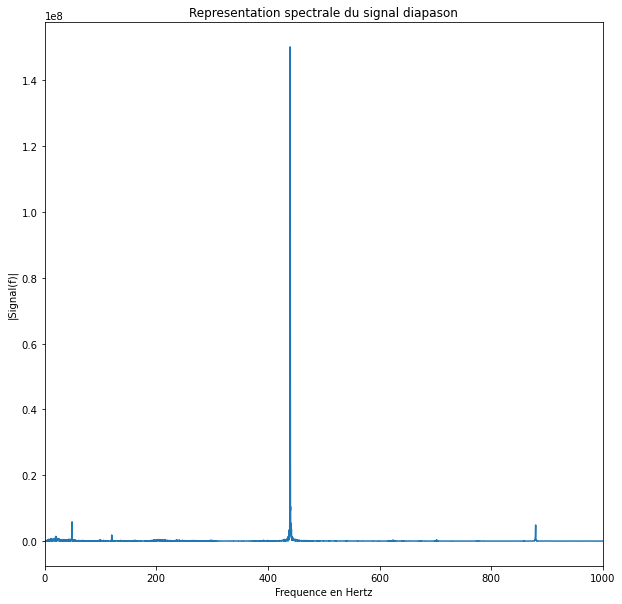

In [32]:
# 2.2 Principe d’incertitude temps-fréquence
#Question 5

fe_dia,x_dia=wav.read("diapason.wav") # extraction du signal audio et de la fréquence d'echantillonage
f=np.linspace(0,fe_dia,len(x_dia))
tfd=np.fft.fft(x_dia)
tfd=abs(tfd)

# représentation spectrale du signal 
plt.figure(figsize=(10,10))
plt.plot(f,tfd)
plt.xlabel("Frequence en Hertz")
plt.ylabel("|Signal(f)|")
plt.title("Representation spectrale du signal diapason")
plt.show()


plt.figure(figsize=(10,10))
plt.plot(f,tfd)
plt.xlim(0,1000)
plt.xlabel("Frequence en Hertz")
plt.ylabel("|Signal(f)|")
plt.title("Representation spectrale du signal diapason")
plt.show()


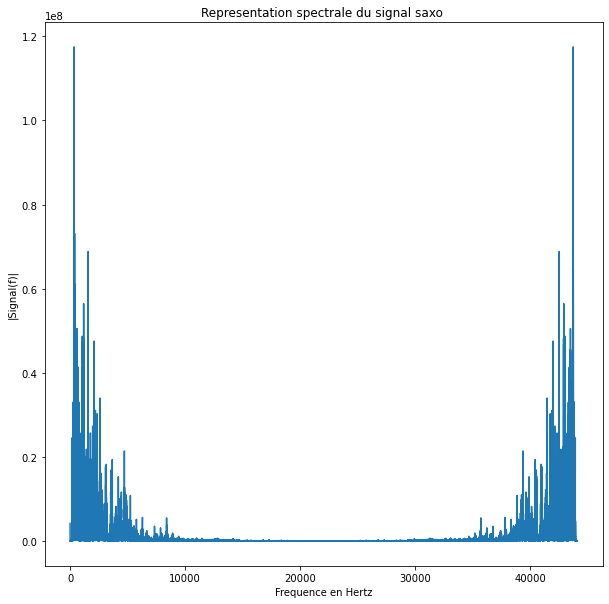

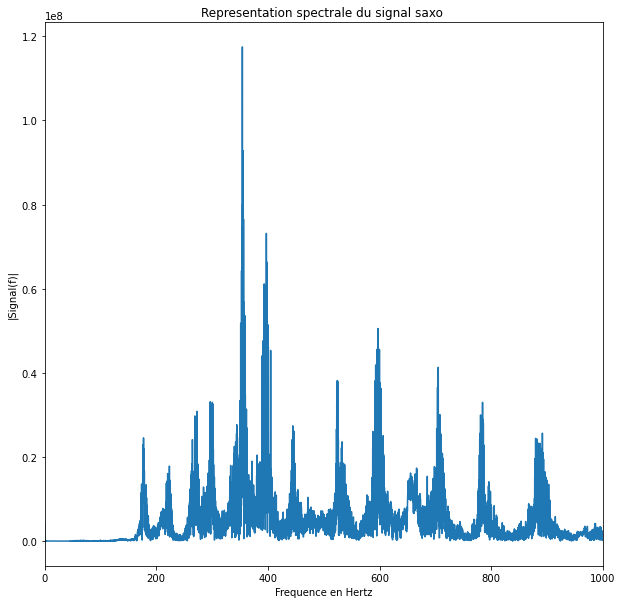

In [33]:
# Question 6

fe_p,x_p=wav.read("saxo.wav")
f=np.linspace(0,fe_p,len(x_p))
tfd=np.fft.fft(x_p)
tfd=abs(tfd)

# représentation spectrale du signal 
plt.figure(figsize=(10,10))
plt.plot(f,tfd)
plt.xlabel("Frequence en Hertz")
plt.ylabel("|Signal(f)|")
plt.title("Representation spectrale du signal saxo ")
plt.show()

plt.figure(figsize=(10,10))
plt.plot(f,tfd)
plt.xlim(0,1000)
plt.xlabel("Frequence en Hertz")
plt.ylabel("|Signal(f)|")
plt.title("Representation spectrale du signal saxo ")
plt.show()


1024 488


Text(0, 0.5, 'frequence en Hertz')

<Figure size 432x288 with 0 Axes>

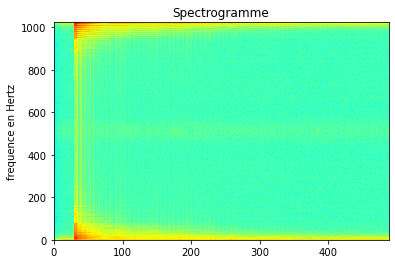

In [38]:
# 7 Précision fréquentielle : 


#variation de Nfft a partir de 1024 échantillons puis en augmentant le multiple de 2.
fe,x_vect=wav.read("piano.wav")
plt.figure()
Nwin = 1024;
Nfft = 1024;
Nhop = Nwin;
x_mat,ts,fs= tftct(x_vect,Nwin,Nhop,Nfft, fe)

plt.figure()
plt.imshow(20*np.log10(x_mat),aspect ='auto', origin='lower',cmap='jet')
plt.title('Spectrogramme')
plt.ylabel("frequence en Hertz")
plt.xlabel("trames")

128 3906


<ipython-input-41-802cfcf2f721>:13: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(20*np.log10(x_mat),aspect ='auto', origin='lower',cmap='jet')


<Figure size 432x288 with 0 Axes>

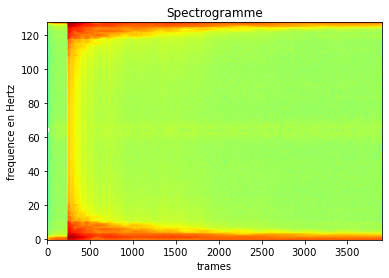

In [41]:
# 8 Résolution fréquentielle :

#variation de Nwin et Nfft a partir de 128 echantillons puis en augmentant le multiple de 2.
fe,x=wav.read('piano.wav')
plt.figure()
Nwin = 128;
Nfft = 128;
Nhop = Nwin;
x_mat,ts,fs= tftct(x_vect,Nwin,Nhop,Nfft, fe)
plt.figure()
plt.imshow(20*np.log10(x_mat),aspect ='auto', origin='lower',cmap='jet')
plt.title('Spectrogramme')
plt.ylabel("frequence en Hertz")
plt.xlabel("trames")
plt.show()
